## Image Processing - Lecture

#### Import required libraries

In [3]:
import cv2
import numpy as np
from matplotlib import cm
from skimage.color import rgb2gray
from skimage.io import imread, imsave, imshow

#### Open image with pixel values ranging from 0 to 1

In [4]:
image = imread(r'C:/Users/digag/Desktop/DigAg2022/Lab05/corn1.jpg')/ 255

### Point Operators

#### Brightness adjustment by intensity scaling

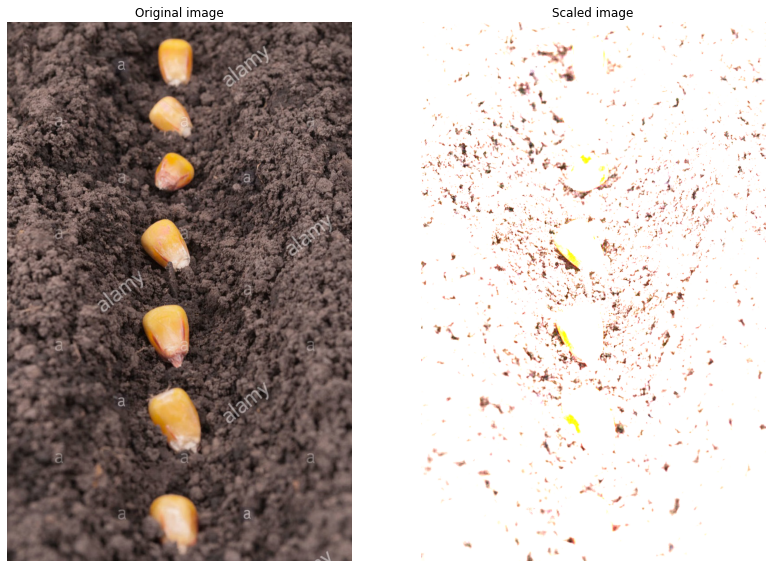

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

scale = 7
scaled_image = np.clip(scale * image, 0, 1)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(scaled_image)
plt.title('Scaled image')
plt.axis('off')
plt.tight_layout()
plt.show()

imsave('chap2_Brightness_scaled.png', np.array(scaled_image * 255, dtype=np.uint8))

#### Contrast adjustment by changing gamma

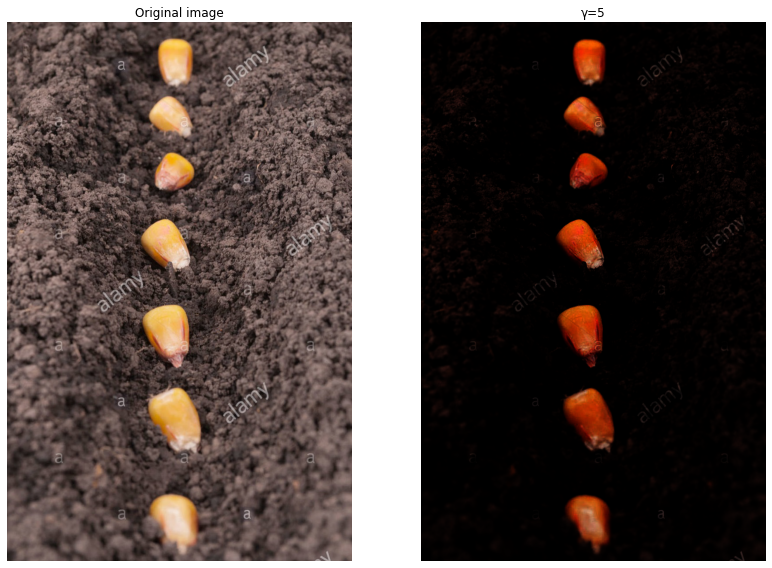

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

gamma = 5
gamma_image = np.clip(image ** gamma, 0, 1)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gamma_image)
plt.title('\u03B3={}'.format(gamma))
plt.axis('off')
plt.tight_layout()
plt.show()

imsave('Contrast_gamma.png', np.array(gamma_image * 255, dtype=np.uint8))

### Linear filtering - Convolution

#### Reopen image with pixel values ranging from 0 to 255

In [10]:
image = imread(r'C:/Users/digag/Desktop/DigAg2022/Lab05/image1.png')

#### Identity

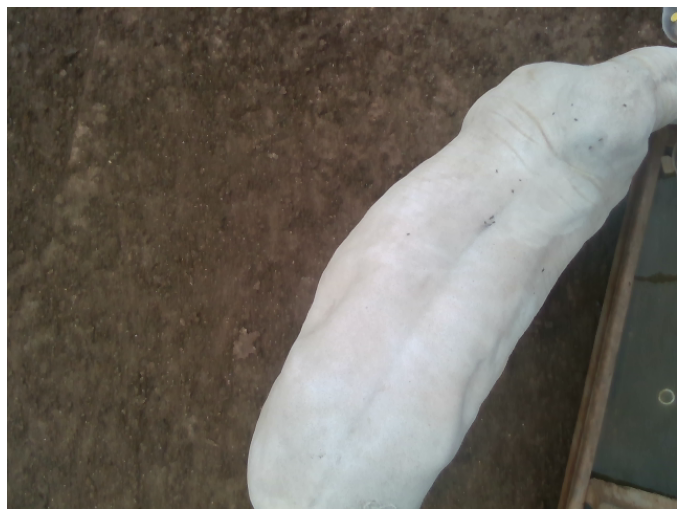

In [11]:
I = np.array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 0]])
image_I = cv2.filter2D(image, -1, I)
plt.figure(figsize=(12, 12))
plt.imshow(image_I)
plt.axis('off')
plt.show()

(480, 640, 3)

#### Edge Detection - Sobel Vertical

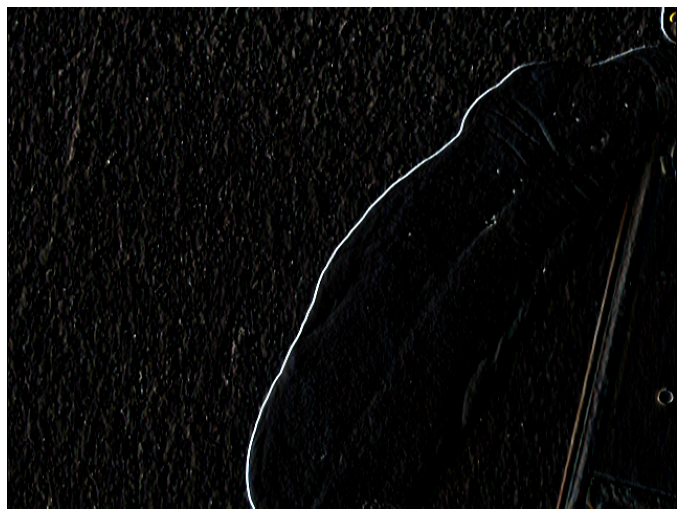

In [13]:
sobelvert = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])
image_sobelvert = cv2.filter2D(image, -1, sobelvert)
plt.figure(figsize=(12, 12))
plt.imshow(image_sobelvert)
plt.axis('off')
plt.show()

#### Edge Detection - Sobel Horizontal

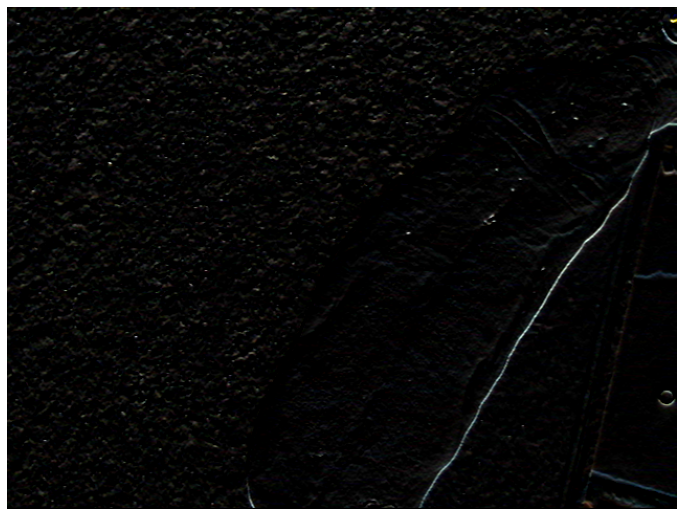

In [15]:
sobelhoriz = np.array([[ 1,  2,  1],
                       [ 0,  0,  0],
                       [-1, -2, -1]])
image_sobelhoriz = cv2.filter2D(image, -1, sobelhoriz)
plt.figure(figsize=(12, 12))
plt.imshow(image_sobelhoriz)
plt.axis('off')
plt.show()

#### Plot Sober Vertical and Horizontal

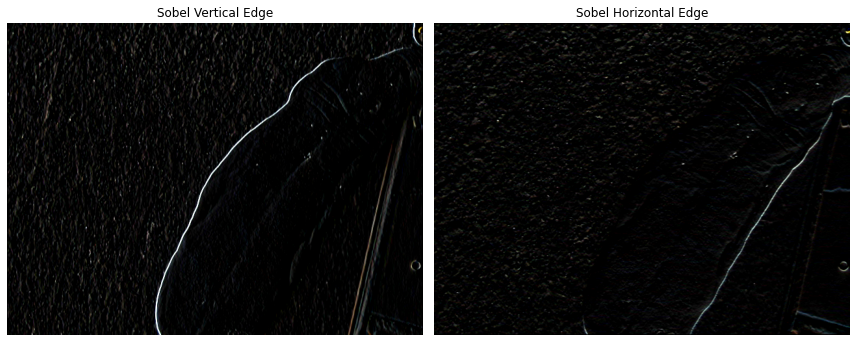

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image_sobelvert)
plt.title('Sobel Vertical Edge')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_sobelhoriz)
plt.title('Sobel Horizontal Edge')
plt.axis('off')
plt.tight_layout()
plt.show()

#### Other filters for edge detection

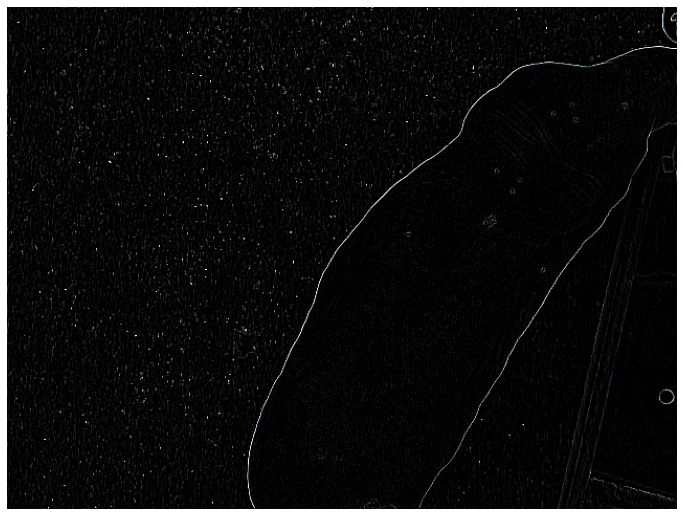

In [17]:
edge = np.array([[-1, -1, -1],
                 [-1,  8, -1],
                 [-1, -1, -1]])
image_edge = cv2.filter2D(image, -1, edge)
plt.figure(figsize=(12, 12))
plt.imshow(image_edge)
plt.axis('off')
plt.show()

#### Sharpen

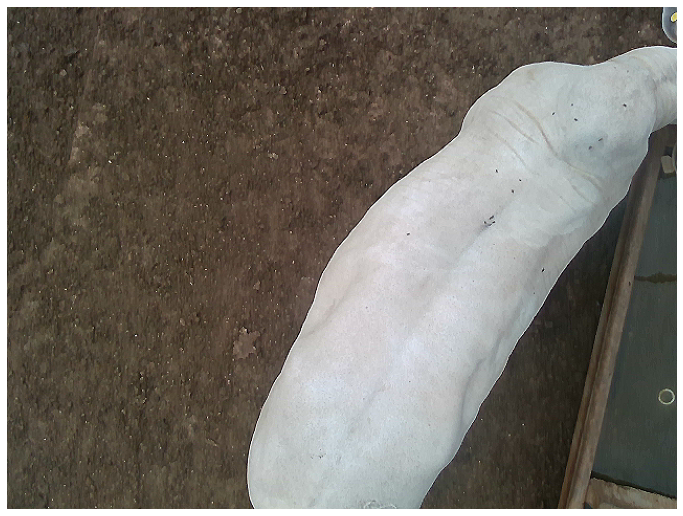

In [23]:
sharp = np.array([[ 0, -1,  0],
                  [-1,  5, -1],
                  [ 0, -1,  0]])
image_sharp = cv2.filter2D(image, -1, sharp)
plt.figure(figsize=(12, 12))
plt.imshow(image_sharp)
plt.axis('off')
plt.show()

### Gaussian Filter

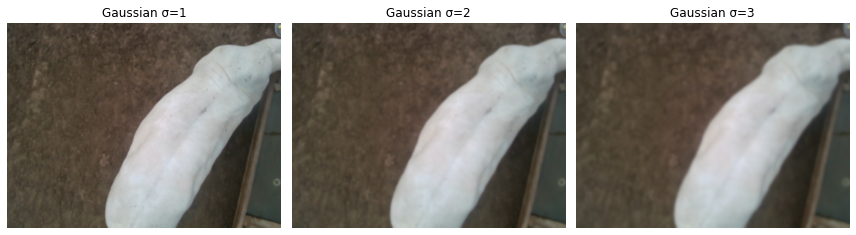

In [24]:
image_gauss1 = cv2.GaussianBlur(image, (0, 0), 1)
image_gauss2 = cv2.GaussianBlur(image, (0, 0), 2)
image_gauss3 = cv2.GaussianBlur(image, (0, 0), 3)

plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(image_gauss1)
plt.title('Gaussian \u03C3=1')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(image_gauss2)
plt.title('Gaussian \u03C3=2')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_gauss3)
plt.title('Gaussian \u03C3=3')
plt.axis('off')
plt.tight_layout()
plt.show()


#### Template Matching

#### Open Corn Example

In [34]:
image = imread(r'C:/Users/digag/Desktop/DigAg2022/Lab05/corn1.jpg')/ 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


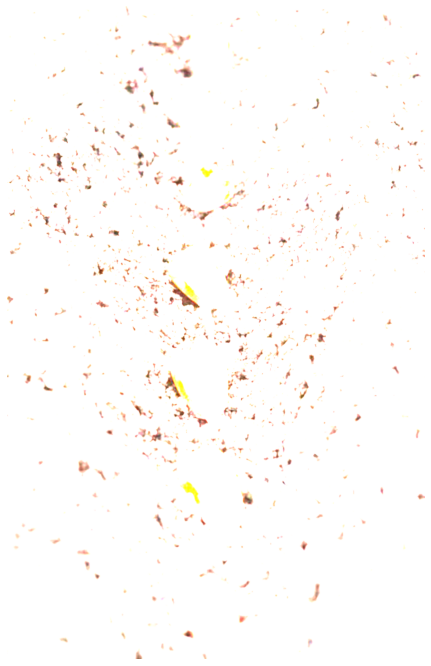

In [35]:
#include corn filter


sharp = np.array([[ 1, 1,  1],
                  [1, 1, 1],
                  [ 1, 1,  1]])
image_sharp = cv2.filter2D(image, -1, sharp)
plt.figure(figsize=(12, 12))
plt.imshow(image_sharp)
plt.axis('off')
plt.show()

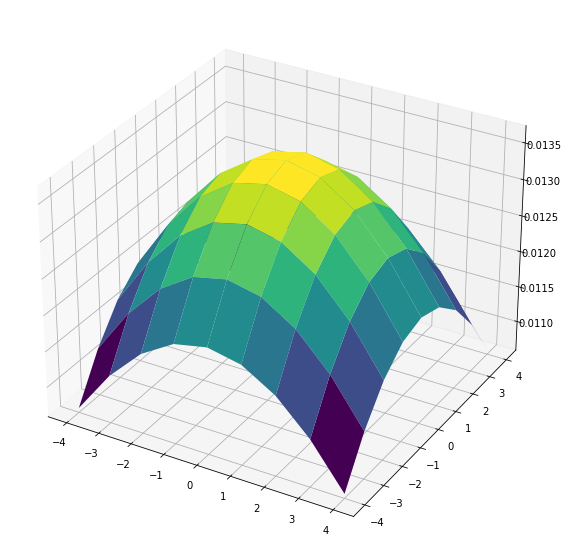

In [51]:
sigma = 8 # Standard Deviation
size = 4  # Window Size
x, y = np.meshgrid(range(-size, size+1), range(-size, size+1))
M = x.shape[0] - 1
N = y.shape[0] - 1
exp_comp = -(x**2 + y**2) / (2 * sigma**2)
kernel = np.exp(exp_comp) / (2 * np.pi * sigma**2)
kernel /= np.sum(kernel)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(10, 10)
surf = ax.plot_surface(x, y, kernel, cmap=cm.viridis)

#### Manually convolute Gaussian kernel over image

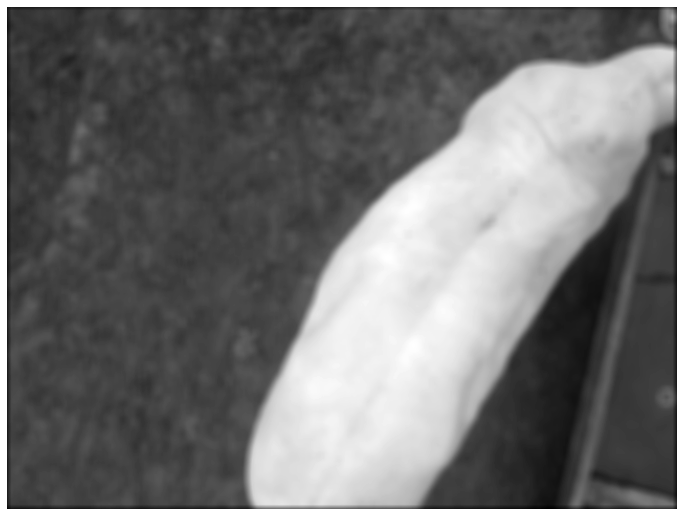

In [52]:
# Load image as grayscale
I = rgb2gray(image) * 255
# Initialize resulting image
output = np.zeros(I.shape)
# Pad the image with zeros
I = np.pad(I, ((size,size), (size,size)))

# Convolution
for i in range(I.shape[0] - M):
    for j in range(I.shape[1] - N):
        temp = I[i:i+M+1, j:j+N+1] * kernel
        output[i, j] = np.sum(temp)

# Resulting image after applying Gaussian blur
output = np.array(output, np.uint8)
plt.figure(figsize=(12, 12))
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()